<a href="https://colab.research.google.com/github/naveen-pixel07/2025_ML/blob/main/K_means_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform K-means clustering on the `/content/IRIS.csv` dataset, including data loading, preprocessing, determining the optimal number of clusters using the elbow method, applying K-means, visualizing the clusters using PCA, and summarizing the clustering results.

## Load Dataset

### Subtask:
Load the `/content/IRIS.csv` dataset into a pandas DataFrame. Inspect the first few rows and basic statistics to understand the data structure.


**Reasoning**:
To load the dataset, display its head, and show descriptive statistics, I will use a code block to import pandas, read the CSV file, and then call the .head() and .describe() methods on the DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/IRIS.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDescriptive statistics of the DataFrame:")
print(df.describe())

First 5 rows of the DataFrame:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Descriptive statistics of the DataFrame:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000 

## Prepare Data for Clustering

### Subtask:
Select the numerical features relevant for clustering (e.g., 'sepal_length', 'sepal_width', 'petal_length', 'petal_width') and scale them using StandardScaler to ensure all features contribute equally to the distance calculations.


**Reasoning**:
To prepare the data for clustering, I will first select the numerical features from the DataFrame, then import `StandardScaler` from `sklearn.preprocessing`, instantiate it, and finally fit and transform the selected features to scale them.



In [2]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features for clustering
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(X)

print("Shape of original features:", X.shape)
print("First 5 rows of scaled features:")
print(scaled_features[:5])

Shape of original features: (150, 4)
First 5 rows of scaled features:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


## Determine Optimal Number of Clusters (Elbow Method)

### Subtask:
Apply the elbow method to determine the optimal number of clusters (k) for K-means. This involves running K-means for a range of k values and plotting the inertia (sum of squared distances of samples to their closest cluster center) to identify the 'elbow point'.


**Reasoning**:
To perform the elbow method, I need to import `KMeans` from `sklearn.cluster` and `matplotlib.pyplot` for plotting. Then, I will iterate through a range of `k` values, fit a `KMeans` model for each `k`, store its inertia, and finally plot these inertia values to identify the elbow point.



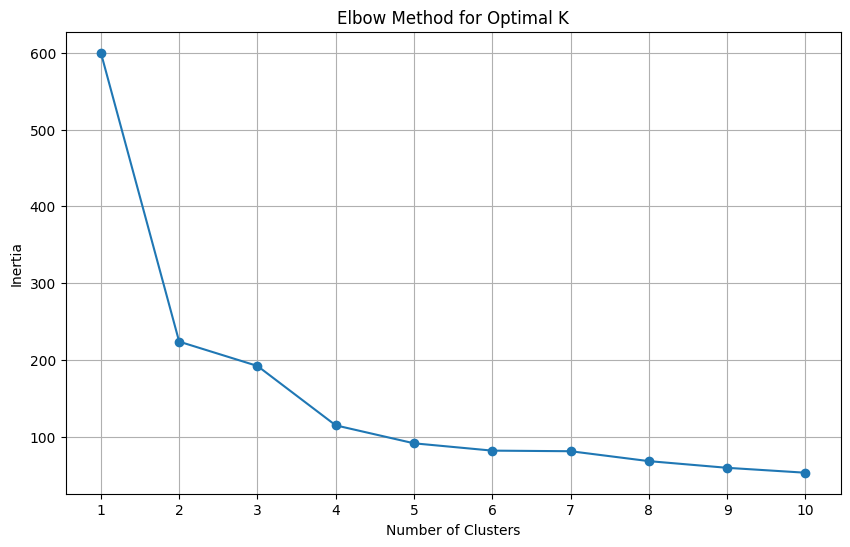

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia_values = []

# Define a range of k values to test (e.g., from 1 to 10)
k_range = range(1, 11)

# Iterate through the range of k values
for k in k_range:
    # Instantiate KMeans with the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the KMeans model to the scaled features
    kmeans.fit(scaled_features)

    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the range of k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


## Perform K-means Clustering

### Subtask:
Apply the K-means algorithm with the optimal number of clusters determined in the previous step. Assign the cluster labels back to the original DataFrame.


**Reasoning**:
To apply K-means clustering, I will instantiate the KMeans model with n_clusters=3, fit it to the scaled features, predict the cluster labels, and then add these labels as a new column to the original DataFrame.



In [4]:
from sklearn.cluster import KMeans

# Instantiate KMeans with optimal k=3 (from elbow method)
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the KMeans model to the scaled features
kmeans_model.fit(scaled_features)

# Predict the cluster labels
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the original DataFrame
df['cluster_label'] = cluster_labels

print("First 5 rows of DataFrame with cluster labels:")
print(df.head())
print("\nValue counts for cluster labels:")
print(df['cluster_label'].value_counts())

First 5 rows of DataFrame with cluster labels:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   cluster_label  
0              1  
1              2  
2              2  
3              2  
4              1  

Value counts for cluster labels:
cluster_label
0    96
1    32
2    22
Name: count, dtype: int64


## Visualize Clusters

### Subtask:
Use Principal Component Analysis (PCA) to reduce the dimensionality of the scaled data to two components for visualization. Create a scatter plot of the clusters, colored by the assigned K-means cluster labels, and include a legend to distinguish the clusters. Also, overlay the cluster centroids on the plot.


**Reasoning**:
To visualize the clusters, I will first use PCA to reduce the dimensionality of the scaled features to two components, then transform the cluster centroids, and finally create a scatter plot of the PCA-reduced data colored by cluster labels, overlaying the transformed centroids with appropriate labels and a legend.



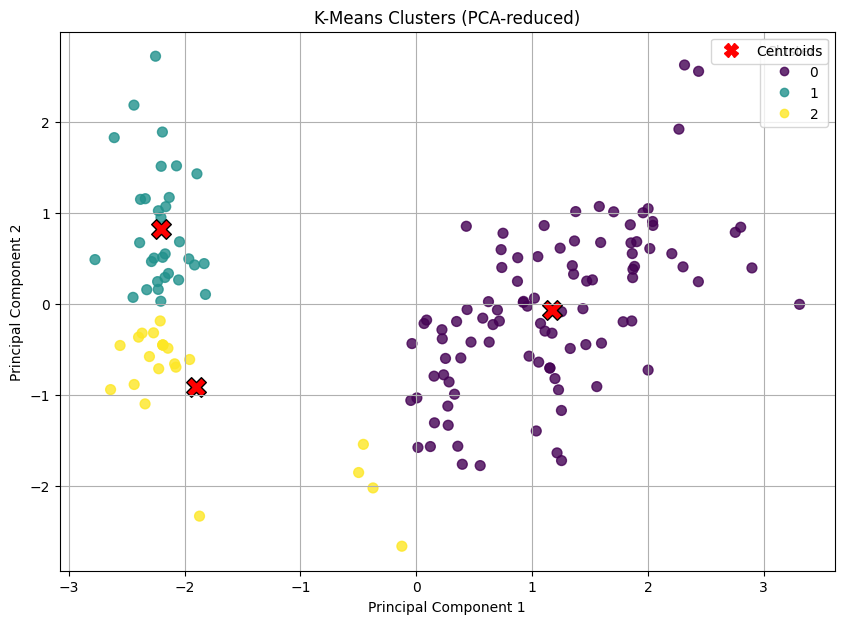

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# Fit PCA to the scaled features and transform them
pca_components = pca.fit_transform(scaled_features)

# Get the cluster centroids from the KMeans model
centroids = kmeans_model.cluster_centers_

# Transform the centroids using the fitted PCA model
pca_centroids = pca.transform(centroids)

# Create a scatter plot
plt.figure(figsize=(10, 7))

# Plot the clustered data points
scatter = plt.scatter(pca_components[:, 0],
                      pca_components[:, 1],
                      c=df['cluster_label'], # Color by cluster label
                      cmap='viridis',
                      s=50,
                      alpha=0.8,
                      label='Data points')

# Plot the centroids
plt.scatter(pca_centroids[:, 0],
            pca_centroids[:, 1],
            marker='X',
            s=200, # Large marker size for centroids
            color='red',
            label='Centroids',
            edgecolors='black')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (PCA-reduced)')

# Create a legend based on cluster labels
legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)

# Add a legend for centroids separately
plt.legend(handles=[plt.Line2D([], [], marker='X', color='red', linestyle='None', markersize=10, label='Centroids')], loc='upper right')

plt.grid(True)
plt.show()